In [36]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train))
x_zo = []
y_zo = []
for i in range(len(y_train)):
    if y_train[i] == 0 or y_train[i] == 1 or y_train[i] == 2:
        x_zo.append(x_train[i])
        y_zo.append(y_train[i])
print(len(y_zo))
xt_zo = []
yt_zo = []

for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 1 or y_test[i] == 2:
        xt_zo.append(x_test[i])
        yt_zo.append(y_test[i])
print(len(yt_zo))
x_zo = np.array(x_zo)
y_zo = np.array(y_zo)
xt_zo = np.array(xt_zo)
yt_zo = np.array(yt_zo)

<class 'numpy.ndarray'>
18623
3147


In [37]:
if K.image_data_format() == 'channels_first':
    x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
batch_size = 128
num_classes = 3
epochs = 12
x_train = x_zo.astype('float32')
x_test = xt_zo.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_zo, num_classes )
y_test =  keras.utils.to_categorical(yt_zo, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name = "inputLayer"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (18623, 28, 28, 1)
18623 train samples
3147 test samples
Epoch 1/12
18623/18623 [==============================] - 29s 2ms/step - loss: 0.1195 - acc: 0.9616

In [70]:
if K.image_data_format() == 'channels_first':
    x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
    xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
batch_size = 128
num_classes = 3
epochs = 12
x_train = x_zo.astype('float32')
x_test = xt_zo.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_zo, num_classes )
y_test =  keras.utils.to_categorical(yt_zo, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name = "inputLayer"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (18623, 28, 28, 1)
18623 train samples
3147 test samples
Epoch 1/12
18623/18623 [==============================] - 31s 2ms/step - loss: 0.1102 - acc: 0.9648

In [113]:
res = model.predict(x_test[0:1])
print(res, y_test[0:1])

[[  3.75435377e-11   1.71997125e-10   9.94612098e-01]] [[ 0.  0.  1.]]


In [120]:
model.layers

In [126]:
w1, b1 = model.layers[0].get_weights()
w2, b2 = model.layers[1].get_weights()
w4, b4 = model.layers[3].get_weights()
w5, b5 = model.layers[4].get_weights()

In [135]:
X = x_test[0:1]
X[0][3]
#X1 = np.multiply(w1,X)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.45490196],
       [ 0.49019608],
       [ 0.67058825],
       [ 1.        ],
       [ 1.        ],
       [ 0.58823532],
       [ 0.36470589],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]], dtype=float32)

In [105]:
W = model.get_weights()
w,b = model.layers[0].get_weights()
print(len(b),len(model.layers))
w[0][0]

32 5


array([[ 0.22453645,  0.04581326,  0.1861829 , -0.16040848,  0.19114304,
        -0.06762332, -0.03503918, -0.05004219,  0.11370496,  0.17326893,
         0.18846688, -0.10725031,  0.12068876,  0.09081738, -0.09744596,
        -0.06893009, -0.11200488, -0.12226102, -0.0814598 ,  0.09370626,
        -0.1578477 ,  0.03763894, -0.1038045 ,  0.15188017,  0.04330318,
        -0.0486319 ,  0.04487037,  0.02240774, -0.0412462 ,  0.08530463,
        -0.01649054, -0.05160175]], dtype=float32)

In [102]:
W = model.get_weights()
w,b = model.layers[1].get_weights()
print(len(b))
len(w[1][0][0])

64


64

In [79]:
import pygraphviz as pgv
import itertools
print(len(W[0]))
d={'1': {'2': None,'6': None}, '2': {'1': None, '3': None}, '3': {'2': None}}
d = dict(itertools.zip_longest(*[iter(W)] * 2, fillvalue=""))
G = pgv.AGraph(d)
dotfile = "file.dot"
imfile = "file.png"
G.write(dotfile)
G.layout(prog = 'dot')
G.draw(imfile)

3


TypeError: unhashable type: 'numpy.ndarray'

Populating the interactive namespace from numpy and matplotlib


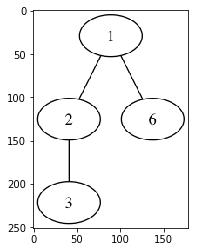

In [58]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(imfile)
imgplot = plt.imshow(img)
plt.show()

In [7]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________